## TELCO CUSTOMER CHURN EDA AND ANALYSIS

In [257]:
#import basic libraries and visualization libraries
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [258]:
#library for checking missing values
import missingno as msno

In [259]:
#read in the csv file
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [260]:
#set display options 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [261]:
#Always have a look at your data 
#7043 rows (customers) and 20 features and 1 Target 
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [262]:
df.head(489)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,5949-XIKAE,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


In [263]:
#cleaning up a corrupt value in Total charges
df.replace(" ",0, inplace=True)

In [264]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [265]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [266]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [267]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [268]:
#check out senior citizen
# Senior citizen is binary
# partner needs to be changed to binary
# dependents needs to be changed to binary
# phone service needs to be changed to binary
#check out multiple lines should be changed to numerical/binary
#internet service is categorical
#online security is binary
#online back up binary
#DeviceProtection	TechSupport	StreamingTV	StreamingMovies ALL binary categories
#
#COntract is categoricla non binary
#payment method is categoricla
# monthly charges is float
#total charges is numerical float


#TARGET IS CHURN BINARY CLASSIFICATION


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


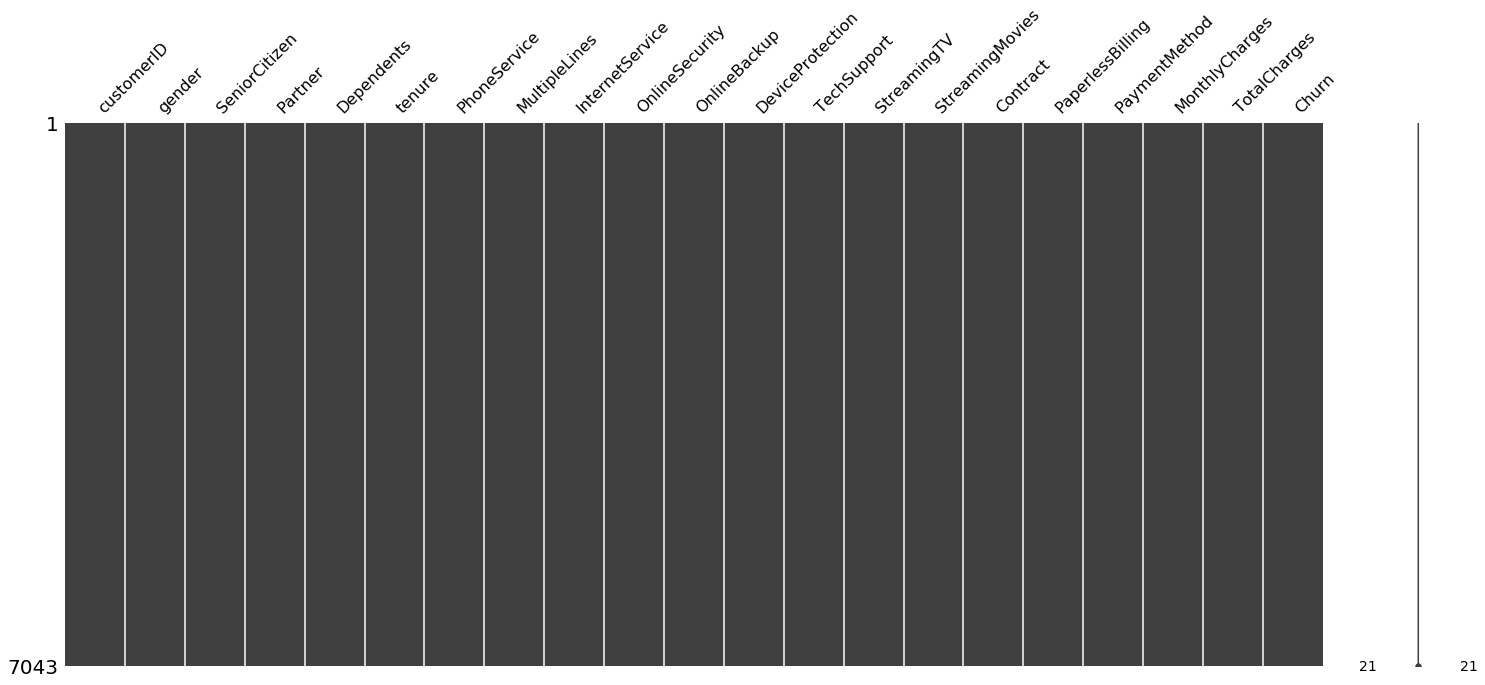

In [270]:
# Check for missing or null values
#It all looks good
msno.matrix(df)

In [271]:
# Lets explore the target
df.Churn.value_counts(normalize=True)
# we see that we have a churn rate of 23% and 74% of our customers stayed with the service

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [272]:
fig = px.histogram(df, x='Churn', color='Churn', )
fig.show()

In [273]:
#explore more of the non binary categories
df.InternetService.value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [274]:
df.MultipleLines.value_counts(normalize=True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

In [275]:
df.Contract.value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [276]:
df.PaymentMethod.value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [277]:
# explore the binary categories

In [278]:
#all of these have three categories one being that there is no internet service
#i could split the data set by internet vs interenet
print(df.OnlineSecurity.value_counts(normalize=True))
print(df.OnlineBackup.value_counts(normalize=True))
print(df.DeviceProtection.value_counts(normalize=True))
print(df.TechSupport.value_counts(normalize=True))
print(df.StreamingTV.value_counts(normalize=True))
print(df.StreamingMovies.value_counts(normalize=True))


No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64


In [279]:
#binary class
print(df.PaperlessBilling.value_counts(normalize=True))
print(df.SeniorCitizen.value_counts(normalize=True))
print(df.gender.value_counts(normalize=True))
print(df.Dependents.value_counts(normalize=True))
print(df.Partner.value_counts(normalize=True))
print(df.PhoneService.value_counts(normalize=True))

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64


In [280]:
#appears to be a wide variety of monthly charges
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [281]:
#lets convert the binary categorical to 1 and 0

In [282]:
df.Churn=df.Churn.map(dict(Yes=1, No=0))

In [283]:
df.gender=df.gender.map(dict(Male=1, Female=0))
df.Partner=df.Partner.map(dict(Yes=1, No=0))
df.Dependents=df.Dependents.map(dict(Yes=1, No=0))
df.PaperlessBilling=df.PaperlessBilling.map(dict(Yes=1, No=0))

In [284]:
#maybe look at the ten percent of people who dont have phone service what is their behaviour
#look at the 20 percent who have no internet service, seniors? make a customer profile of these two categories
#CAC is customer aquistition costs total amount to get a new customer and 
#it costs more than mainting an existing one so churn costs alot of $$$
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# Plotting features with the propbaility of churn

Text(0, 0.5, 'Probability Density')

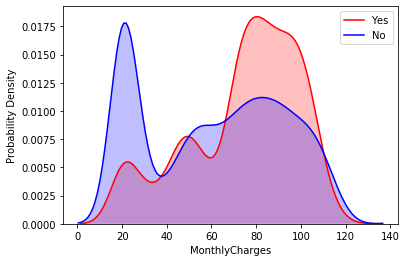

In [285]:
#ANALYSIS OF CHURN BASED ON MONTHLY CHARGES
sns.kdeplot(df.loc[(df['Churn']==1), 
            'MonthlyCharges'], color='r', shade=True, Label='Yes') 
  
sns.kdeplot(df.loc[(df['Churn']==0),  
            'MonthlyCharges'], color='b', shade=True, Label='No') 
  
plt.xlabel('MonthlyCharges') 
plt.ylabel('Probability Density') 

### We observe high probability of churn amongst customers with monthly bills exceeding ~60 dollars

Text(0, 0.5, 'Probability Density')

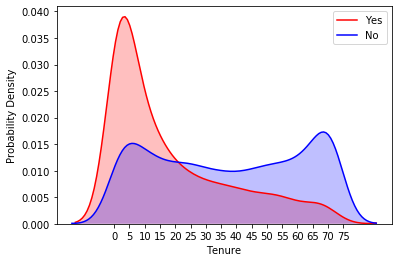

In [286]:
##ANALYSIS OF CHURN BASED ON Tenure
sns.kdeplot(df.loc[(df['Churn']==1), 
            'tenure'], color='r', shade=True, Label='Yes') 
  
sns.kdeplot(df.loc[(df['Churn']==0),  
            'tenure'], color='b', shade=True, Label='No') 
plt.xticks(np.arange(0,80,5))
           
plt.xlabel('Tenure') 
plt.ylabel('Probability Density') 

### High probability of churn in the first 20 months peaking at 3-5 months

_____________________________________________________________________________________________________________________

# Exploration of customer Segmentation

In [287]:
## lets explore some customer segmentation starting with seniors
df_senior=df.SeniorCitizen==1

In [288]:
df_senior=df[df_senior]

In [289]:
df_nsenior=df.SeniorCitizen==0
df_no_senior=df[df_nsenior]

In [290]:
df_no_senior.Churn.value_counts(normalize=True)

0    0.763938
1    0.236062
Name: Churn, dtype: float64

In [291]:
# WE observe that a higher percentage of seniors churn than our overall group when we remove the seniors

df_senior.Churn.value_counts(normalize=True)

0    0.583187
1    0.416813
Name: Churn, dtype: float64

In [292]:
#take a look at phone service vs no phone
df_no_senior.PhoneService.value_counts(normalize=True)

Yes    0.90205
No     0.09795
Name: PhoneService, dtype: float64

In [293]:
#doesnt appear to have an effect
df_senior.PhoneService.value_counts(normalize=True)

Yes    0.908932
No     0.091068
Name: PhoneService, dtype: float64

In [294]:
#type of internet service
df_no_senior.InternetService.value_counts(normalize=True)

Fiber optic    0.383833
DSL            0.366379
No             0.249788
Name: InternetService, dtype: float64

In [295]:
#we observe a SIGNIFICANT difference between seniors and non seniors interms of fiber 
df_senior.InternetService.value_counts(normalize=True)

Fiber optic    0.727671
DSL            0.226795
No             0.045534
Name: InternetService, dtype: float64

In [296]:
#lets look at tenure

In [297]:
np.mean(df_senior.tenure)

33.29597197898424

In [298]:
np.mean(df_no_senior.tenure)

32.19217081850534

In [299]:
#tech support
df_no_senior.TechSupport.value_counts(normalize=True)

No                     0.447890
Yes                    0.302322
No internet service    0.249788
Name: TechSupport, dtype: float64

In [300]:
df_senior.TechSupport.value_counts(normalize=True)

No                     0.726795
Yes                    0.227671
No internet service    0.045534
Name: TechSupport, dtype: float64

In [301]:
#payment methods
df_no_senior.PaymentMethod.value_counts(normalize=True)

Electronic check             0.300119
Mailed check                 0.257245
Bank transfer (automatic)    0.222166
Credit card (automatic)      0.220471
Name: PaymentMethod, dtype: float64

In [302]:
df_senior.PaymentMethod.value_counts(normalize=True)

Electronic check             0.520140
Bank transfer (automatic)    0.204028
Credit card (automatic)      0.193520
Mailed check                 0.082312
Name: PaymentMethod, dtype: float64

In [303]:
## observed a large increase in electronic checks amongst seniors

In [304]:
#monthly charges
np.mean(df_no_senior.MonthlyCharges)

61.84744111167598

In [305]:
np.mean(df_senior.MonthlyCharges)

79.82035901926453

In [306]:
#higher monthly sp[ending for seniors

## PREDICTIVE MODELLING

In [307]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0


In [308]:
#drop customer id
df.drop('customerID', axis=1,inplace=True)

In [309]:
#dummy our categorical feature
df=pd.get_dummies(df)

In [310]:
#seperating our target and features

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,29.85,29.85,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,0,56.95,1889.50,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,53.85,108.15,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,42.30,1840.75,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,70.70,151.65,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [311]:
y=df.pop('Churn')
X=df

In [313]:
#Train test split
from sklearn.model_selection import train_test_split

In [320]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

In [321]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
240,0,0,0,0,72,0,86.60,6350.50,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
850,0,0,1,1,72,1,115.80,8476.50,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
2128,1,0,1,1,41,1,74.55,3023.55,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
596,1,0,0,0,16,0,54.85,916.15,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1
206,1,0,1,1,72,1,55.45,4179.20,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0


### Baseline classification with Logistic regression

In [322]:
from sklearn.linear_model import LogisticRegression

In [323]:
# intsantiate model
model =LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

In [325]:
from sklearn import metrics
y_pred = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, y_pred))

0.7991483321504613


In [337]:
features=X_train.columns

In [381]:
print(" Top features that contribute to positive churn (customer leaves): ",features[34],
features[5],
features[14],
features[1],
features[39],
features[25],
features[16])

 Top features that contribute to positive churn (customer leaves):  Contract_Month-to-month PaperlessBilling InternetService_Fiber optic SeniorCitizen PaymentMethod_Electronic check TechSupport_No OnlineSecurity_No


In [339]:
import eli5
eli5.show_weights(model)

## XGBOOST CLASSIFIER

In [363]:
from xgboost import XGBClassifier

In [364]:
#tune the parameters for binary classification
params = {

'objective': 'binary:logistic',

'max_depth': 2,

'learning_rate': 1.0,

'n_estimators': 5

}

model = XGBClassifier(**params).fit(X_train, y_train)

In [365]:
# use the model to make predictions with the test data

y_pred = model.predict(X_test)

# how did our model perform?

count_misclassified = (y_test != y_pred).sum()

print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 297
Accuracy: 0.79


In [366]:
eli5.show_weights(model)

Weight,Feature
0.5433,Contract_Month-to-month
0.1556,InternetService_Fiber optic
0.0652,tenure
0.0602,PaymentMethod_Electronic check
0.0471,OnlineSecurity_No
0.0443,Contract_Two year
0.0319,PaperlessBilling
0.0194,MultipleLines_No
0.0192,StreamingTV_Yes
0.0097,MonthlyCharges


In [371]:
#showing the contribution of certain features to a specifiv prediction of that customers likelihood to churn
eli5.show_prediction(model, X_test.iloc[189])